In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Task 1:

In [3]:
# Reading the File:
df = pd.read_csv("/content/MLR_data.csv")


## EDA

In [4]:
# Size
df.size

120

In [5]:
# Shape
df.shape

(24, 5)

In [6]:
# Data Types
df.dtypes

Year                   int64
Month                  int64
Interest_Rate        float64
Unemployment_Rate    float64
Stock_Index_Price      int64
dtype: object

In [44]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### The Dependent variable is the Stock_Index_Price and the other variables are the columns other than the Stock_Index_Price.
### We need to see which Independent variables best describe the Dependent variable by eliminating the redundant ones which don't express the IV at all.

# Conclusion:
## We notice that from the pair plot given below, the correlation of Year and Month (Independent variables) with the Stock_Price_Index(Dependent Variable) doesn't give us essential information to proceed and build models based on them,.

## Whereas, Interest_Rate and Unemployment_Rate on the other hand, give us valuable information to proceed build models with Dependent Variables.

## The graphs of Year and Month show a constant slope with no variations in them, hence they don't describe the independent variable effectively at all.

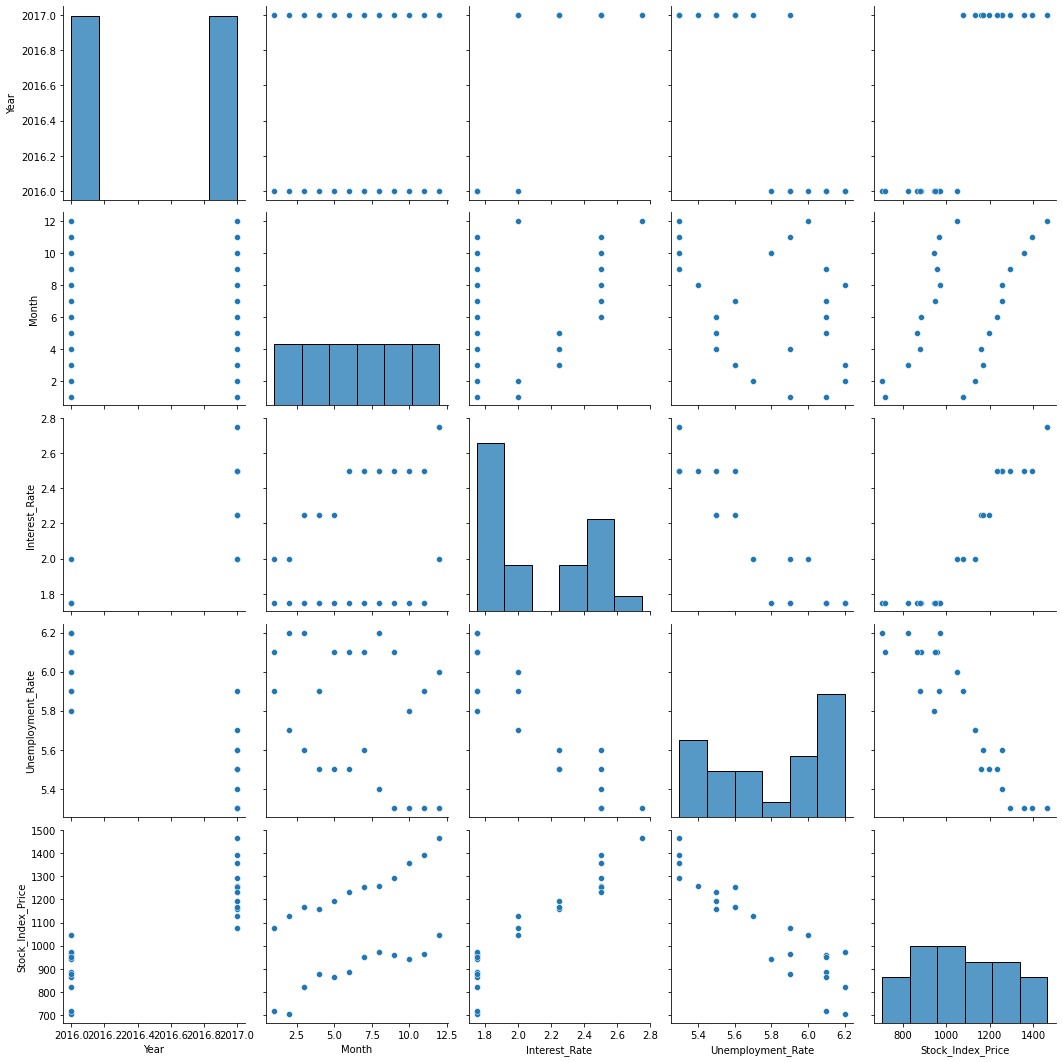

In [9]:
sns.pairplot(df, height = 3, diag_kind = 'hist')

# Task 2:

In [10]:
# import libraries
from sklearn.linear_model import LinearRegression

In [35]:

Month_data = df["Month"]
Interest_rate_data = df["Interest_Rate"]
Unemployment_Rate_data = df["Unemployment_Rate"]
Stock_Index_Price_data = df["Stock_Index_Price"]

# Converting the X array initialized in Task 1 to a 2D arrays.
MD = Month_data.values.reshape((-1, 1))
ID = Interest_rate_data.values.reshape((-1, 1))
URD = Unemployment_Rate_data.values.reshape((-1, 1))


## We notice a positive correlation between the two variables - Month and Stock Index Price:

In [12]:
reg_model = LinearRegression()
reg_model.fit(MD, Stock_Index_Price_data)

reg_model = LinearRegression().fit(MD, Stock_Index_Price_data)



In [13]:
r_sq = reg_model.score(MD, Stock_Index_Price_data)
print("R Square Value : ", r_sq)
b0 = reg_model.intercept_
b1 = reg_model.coef_
print("Intercept (b0) :", reg_model.intercept_)
print()
print("Slope (b1) :", reg_model.coef_)

R Square Value :  0.23163745862450869
Intercept (b0) : 883.1287878787878

Slope (b1) : [28.76223776]


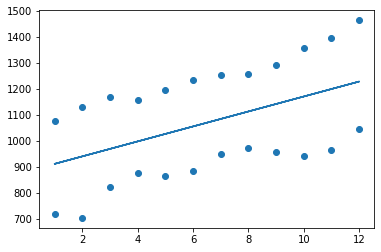

In [14]:
y_pred = b1 * MD + b0
plt.scatter(MD, Stock_Index_Price_data)
plt.plot(MD, y_pred)

plt.show()

## We notice a positive correlation between the two variables - Interest Rate and Stock Index Price:

In [15]:
reg_model = LinearRegression()
reg_model.fit(ID, Stock_Index_Price_data)

reg_model = LinearRegression().fit(ID, Stock_Index_Price_data)

r_sq = reg_model.score(ID, Stock_Index_Price_data)
print("R Square Value : ", r_sq)
print("Intercept (b0) :", reg_model.intercept_)
print()
print("Slope (b1) :", reg_model.coef_)

R Square Value :  0.8757089547891359
Intercept (b0) : -99.46431881371655

Slope (b1) : [564.20389249]


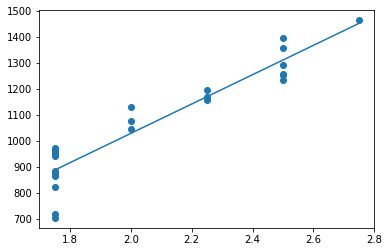

In [16]:
b0 = reg_model.intercept_
b1 = reg_model.coef_
y_pred = b1 * ID + b0
plt.scatter(ID, Stock_Index_Price_data)
plt.plot(ID, y_pred)

plt.show()

In [17]:
ID = 2.75
y_pred = b1 * ID + b0
MSE = ((y_pred - 1464 )**2)/2
print(MSE)

[70.84801858]


## We notice a negative correlation between the two variables - Unemployment Rate and Stock Index Price:

In [18]:
reg_model = LinearRegression()
reg_model.fit(URD, Stock_Index_Price_data)

reg_model = LinearRegression().fit(URD, Stock_Index_Price_data)

r_sq = reg_model.score(URD, Stock_Index_Price_data)
print("R Square Value : ", r_sq)
print("Intercept (b0) :", reg_model.intercept_)
print()
print("Slope (b1) :", reg_model.coef_)

R Square Value :  0.850706607677214
Intercept (b0) : 4471.339321357287

Slope (b1) : [-588.96207585]


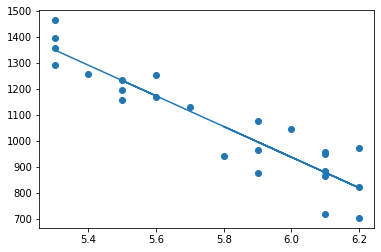

In [19]:
b0 = reg_model.intercept_
b1 = reg_model.coef_
y_pred = b1 * URD + b0
plt.scatter(URD, Stock_Index_Price_data)
plt.plot(URD, y_pred)

plt.show()

In [20]:
URD = 6
y_pred = b1 * URD + b0
MSE = ((y_pred - 1047 )**2)/2
print(MSE)

[5987.80537926]


# Task 3:

# Multiple Regression Model of Interest Rate and Unemployment Rate with Stock Index Price:

In [28]:
x = np.array(df[["Interest_Rate", "Unemployment_Rate"]])
y = np.array(df["Stock_Index_Price"])
reg_model.fit(x, y)
r_sq = reg_model.score(x, y)
print("R Square Value : ", r_sq)
b0 = reg_model.intercept_
b1 = reg_model.coef_[0]
b2 = reg_model.coef_[1]

print("Intercept (b0) :", reg_model.intercept_)
print()
print(b1)
print(b2)

r_sq = reg_model.score(x, y)
print("R Square Value : ", r_sq)
b0 = reg_model.intercept_
b1 = reg_model.coef_[0]
b2 = reg_model.coef_[1]

print("Intercept (b0) :", reg_model.intercept_)
print()
print(b1)
print(b2)
y_pred = b0 + b1*2.75 + b2 * 5.3
print(y_pred)
y_pred = b0 + b1*2 + b2 * 6
print(y_pred)



R Square Value :  0.8976335894170216
Intercept (b0) : 1798.4039776258544

345.54008701056574
-250.14657136938055
R Square Value :  0.8976335894170216
Intercept (b0) : 1798.4039776258544

345.54008701056574
-250.14657136938055
1422.8623886471935
988.6047234307027


# Multiple Regression Model of Interest Rate, Unemployment Rate and Month with Stock Index Price:

In [34]:
x = np.array(df[["Interest_Rate", "Unemployment_Rate", "Month"]])
y = np.array(df["Stock_Index_Price"])
reg_model.fit(x, y)

r_sq = reg_model.score(x, y)
print("R Square Value : ", r_sq)
b0 = reg_model.intercept_
b1 = reg_model.coef_[0]
b2 = reg_model.coef_[1]
b3 = reg_model.coef_[2]

print("Intercept (b0) :", reg_model.intercept_)
print()
print(b1)
print(b2)
print(b3)
y_pred = b0 + b1*2.75 + b2 * 5.3 + b3 * 12
print(y_pred)
y_pred = b0 + b1*2 + b2 * 6 + b3 * 12
print(y_pred)

R Square Value :  0.9230425469229033
Intercept (b0) : 1591.5963382763719

335.1930601634653
-222.08250237506545
10.182486970633022
1458.529834785651
1051.677288000506


## Hence we can conclude from the above 2 models that the model which includes month as a independent variable is more suitable as it's R value = 0.923 which is greater than the R value of the model without month as a independent variable (0.897).

# Task 4:

In [65]:
# Reading the File:
df = pd.read_csv("/content/50_Startups.csv")
df1 = pd.read_csv("/content/50_Startups.csv")


## EDA

In [40]:
# Size
df.size

250

In [41]:
# Shape
df.shape

(50, 5)

In [42]:
# Data Types
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [43]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### The Dependent variable is the Profit and the other variables are the columns other than the Stock_Index_Price.
### We need to see which Independent variables best describe the Dependent variable by eliminating the redundant ones which don't express the IV at all.

# Conclusion:
## We notice that from the pair plot given below, the correlation of Administration and State (Independent variables) with the Profit(Dependent Variable) doesn't give us essential information to proceed and build models based on them.

## Whereas, R&D Spend and Marketing Spend on the other hand, give us valuable information to proceed build models with Dependent Variables.

## The graphs of Administration and State show a constant slope with no variations in them, hence they don't describe the independent variable effectively at all.

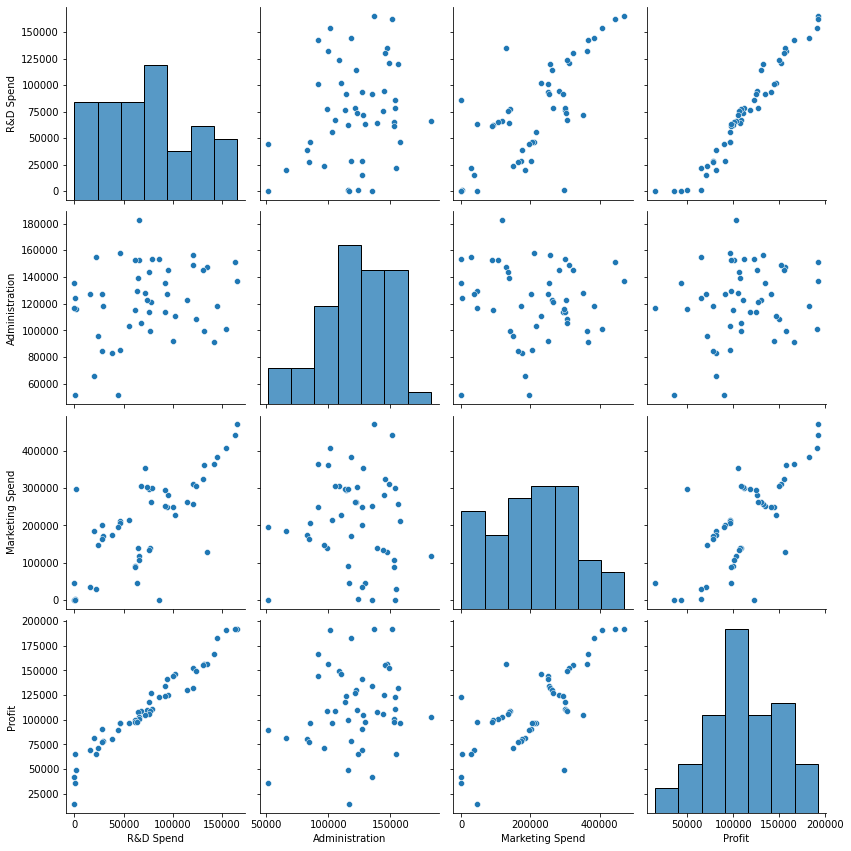

In [39]:
sns.pairplot(df, height = 3, diag_kind = 'hist')

In [53]:
x = np.array(df[['R&D Spend', 'Administration', 'Marketing Spend']])
y = np.array(df['Profit'])
reg_model = LinearRegression()

reg_model.fit(x, y)

r_sq = reg_model.score(x, y)
print("R Square Value : ", r_sq)
b0 = reg_model.intercept_
b1 = reg_model.coef_[0]
b2 = reg_model.coef_[1]
b3 = reg_model.coef_[2]

print("Intercept (b0) :", reg_model.intercept_)
print()
print(b1)
print(b2)
print(b3)
y_pred = b0 + b1*2.75 + b2 * 5.3 + b3 * 12
print(y_pred)
y_pred = b0 + b1*2 + b2 * 6 + b3 * 12
print(y_pred)

R Square Value :  0.9507459940683246
Intercept (b0) : 50122.19298986524

0.8057150499157437
-0.02681596839475075
0.027228064800818817
50124.59331839763
50123.970260932314


## Hence we can conclude that the Multiple Regression model with the respective columns are helpful in building a good model (with r value 0.95).

In [55]:
import statsmodels.api as sm
results = sm.OLS(y, x).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1232.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                    1.17e-44
Time:                        12:35:27   Log-Likelihood:                         -545.82
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      47   BIC:                                      1103.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Conclusion
## From the above experiment, I learnt the following:
1.	Implement multiple linear regression by using sklearn package statsmodels.
2.	Interpret the results obtained from different models and choose the best model for the given data set using R values and P with reference to L.O.S.
